# Network 38 Design

## Imports

In [30]:
from projectlib import *
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation
from IPython.display import HTML
import math

## Import Weighted Directed Adjacency Matrix

In [2]:
region_ids, labels, short_labels = region_setup(38)

## Undirect Adjacency Matrix

In [3]:
nw_mat = np.loadtxt("Pendler.txt")
undirect_adjacency(nw_mat)

## Node Positions

In [4]:
scl = np.sqrt(3)/2
distinct_pos = {0:(9,20*scl), 1:(6,14*scl), 2:(12,10*scl), 3:(3,12*scl), 4:(9,16*scl), 5:(9,12*scl), 6:(15,8*scl), 7:(6,10*scl), 8:(6,6*scl), 9:(9,8*scl), 10:(12,2*scl), 11:(12,6*scl), 12:(6,22*scl), 13:(3,20*scl), 14:(6,18*scl), 15:(3,16*scl), 16:(0,18*scl), 17:(0,14*scl), 18:(0,10*scl), 19:(0,6*scl), 20:(3,8*scl), 21:(3,4*scl), 22:(3,0), 23:(6,2*scl), 24:(9,0), 25:(9,4*scl), 26:(15,0), 27:(15,4*scl), 28:(18,6*scl), 29:(18,10*scl), 30:(18,14*scl), 31:(18,18*scl), 32:(15,16*scl), 33:(15,20*scl), 34:(15,12*scl), 35:(12,18*scl), 36:(12,14*scl), 37:(12,22*scl)}

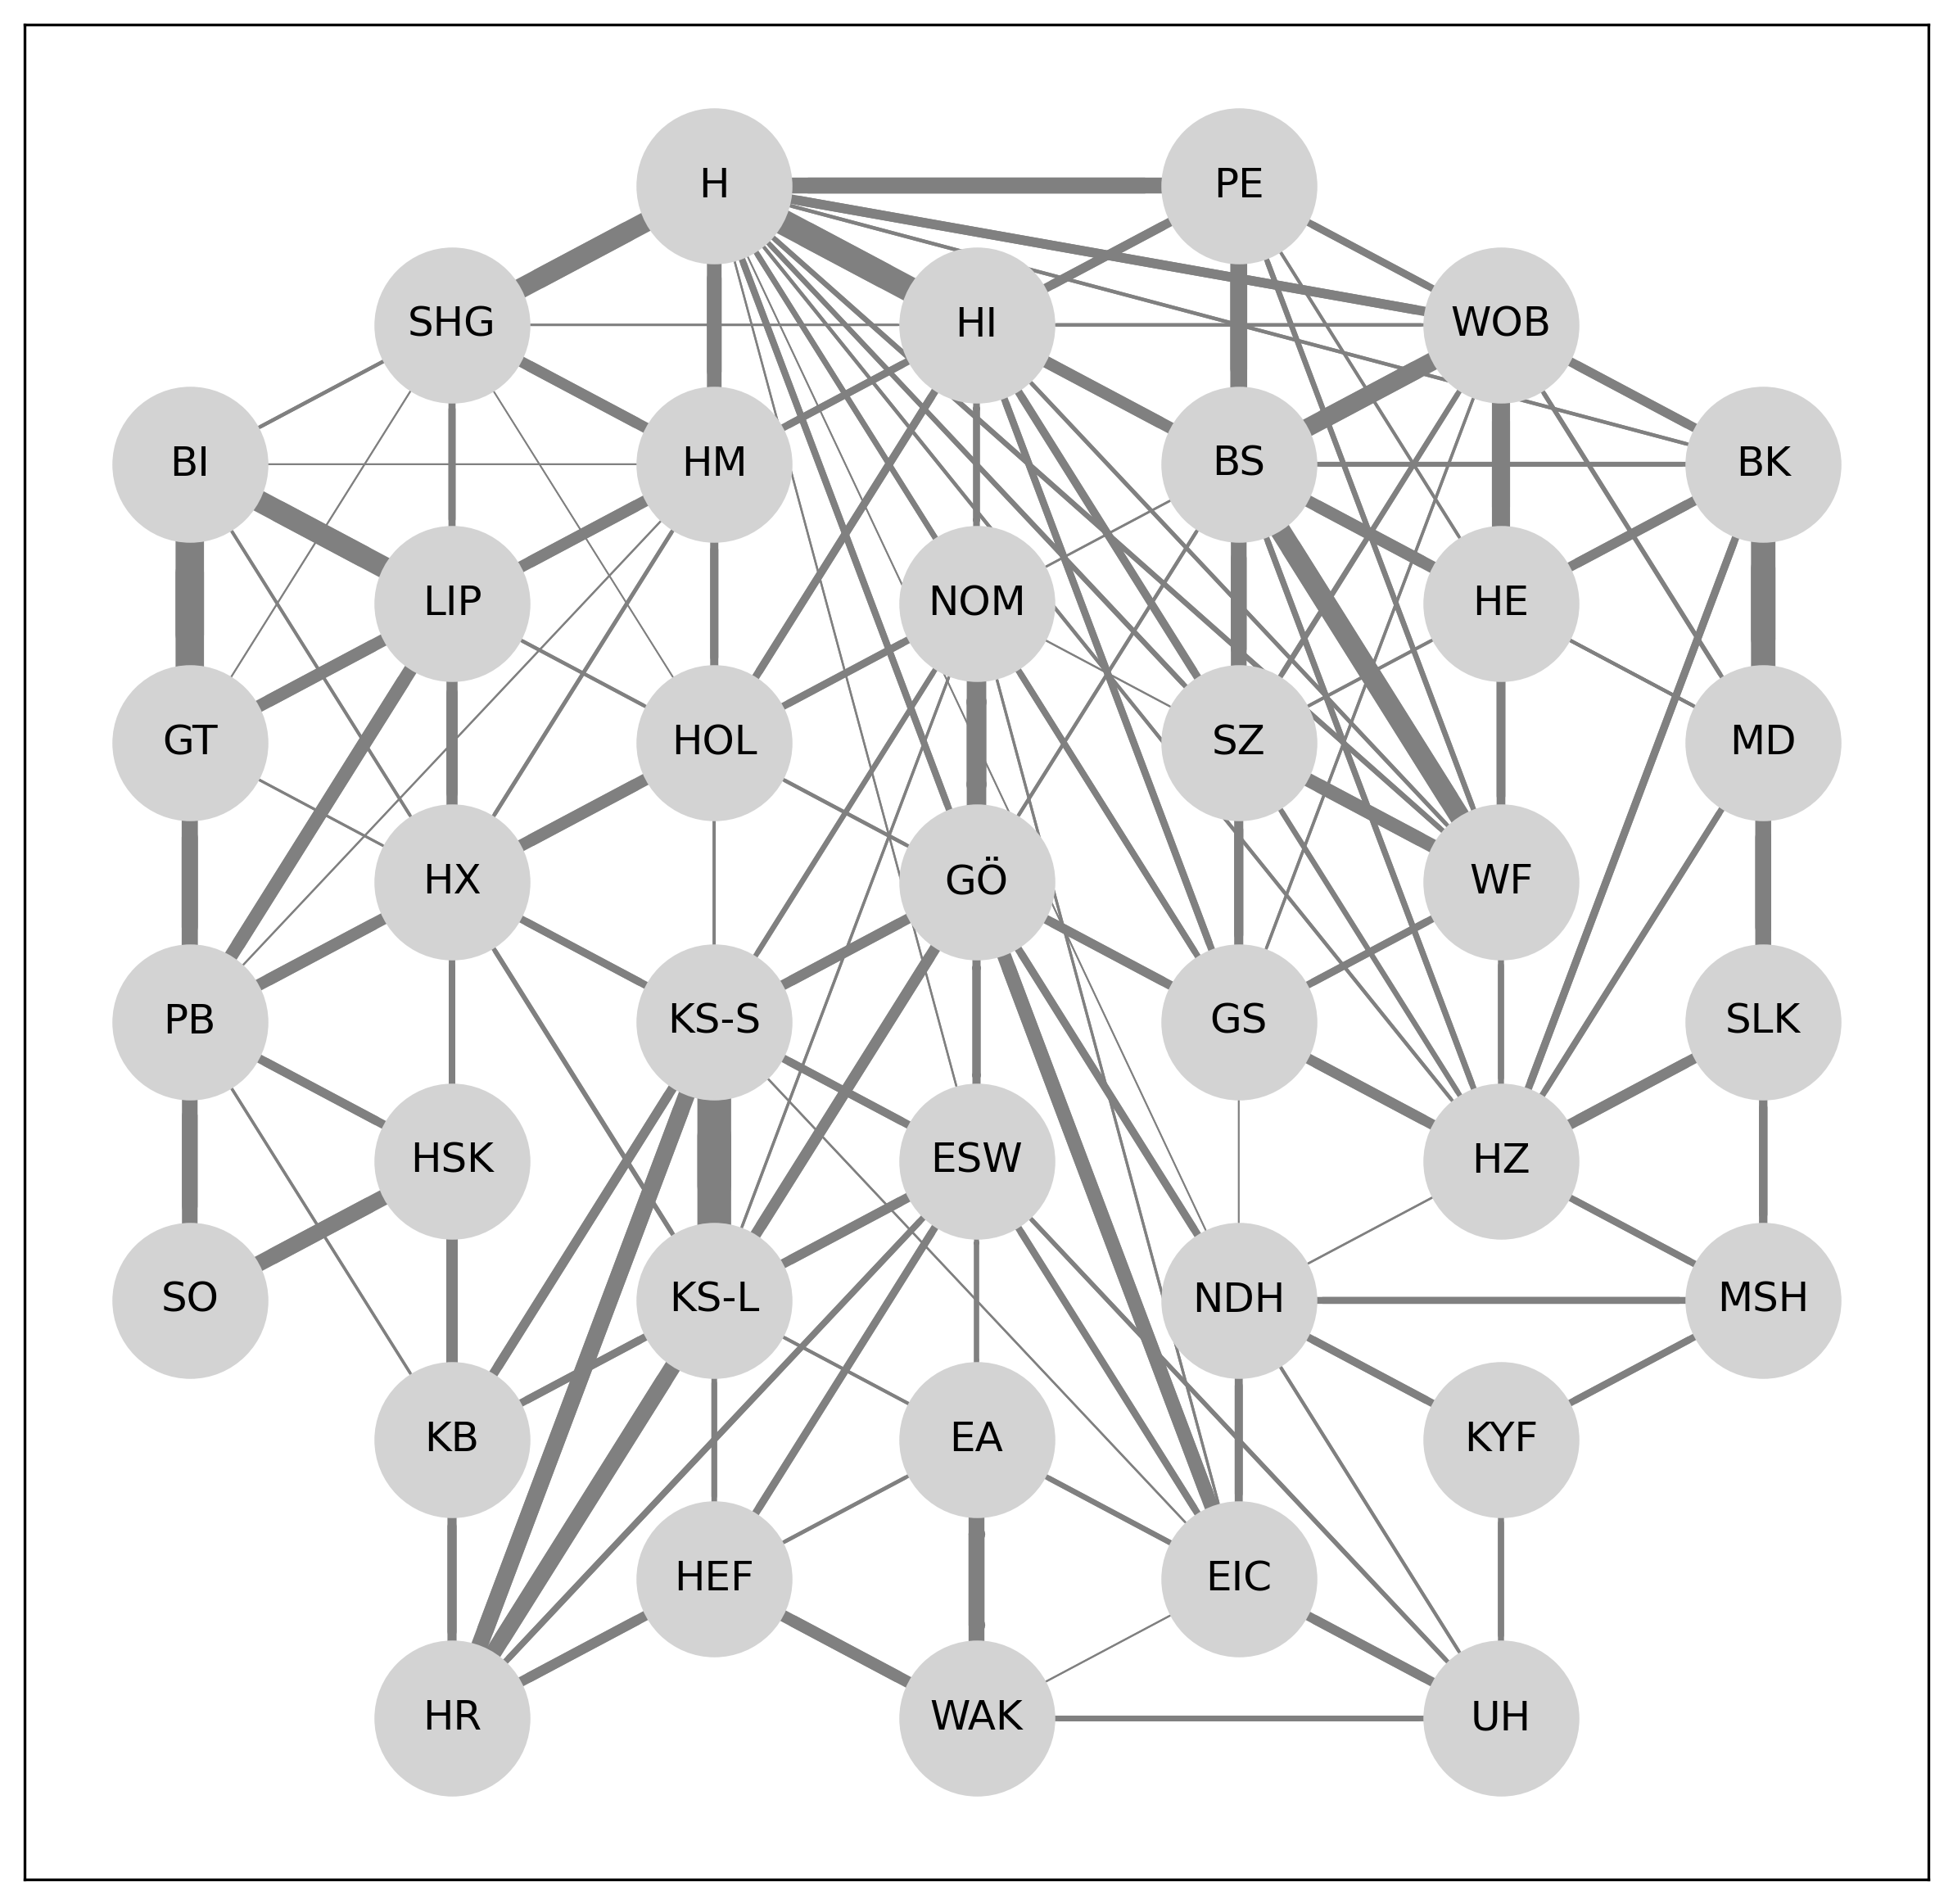

In [5]:
def create_network(matrix,pos):
    """creates and plots undirected weighted network

    Args:
        matrix (array): undirected weighted adjacency matrix
        pos (dictionary): node positions
    """    
    G = nx.DiGraph()
    dim=len(matrix[0])
    for i in range(dim): 
        for j in range(dim): 
            if matrix[i][j] > 0: 
                G.add_edge(i,j, weight=matrix[i][j])
    weights = [np.sqrt(G[u][v]['weight']/500) for u,v in G.edges]
    plt.figure(figsize=(10,10),dpi=300)
    nx.draw_networkx(G,pos, labels=short_labels,node_size=2000, with_labels=True, font_color='black', width=weights, node_color='lightgrey' ,edge_color='grey',cmap=plt.cm.YlOrRd,vmin=0, vmax=0.07,arrowsize=1e-10)
    plt.savefig('Media/Networks/38_Network_Draft.png')
    plt.show()

create_network(nw_mat, distinct_pos)

## Colored Example

In [6]:
RKI_data = np.load("Internal Data/timeline.npy")
S_final=np.zeros(38)
for i in range(38):
    S_final[i]=(1-RKI_data[i][0][-1])

### Colormap

In [46]:
ccm = plt.cm.ScalarMappable(cmap=plt.cm.rainbow, norm=plt.Normalize(vmin = 0, vmax=100000*max(S_final)))
ccm._A = []  

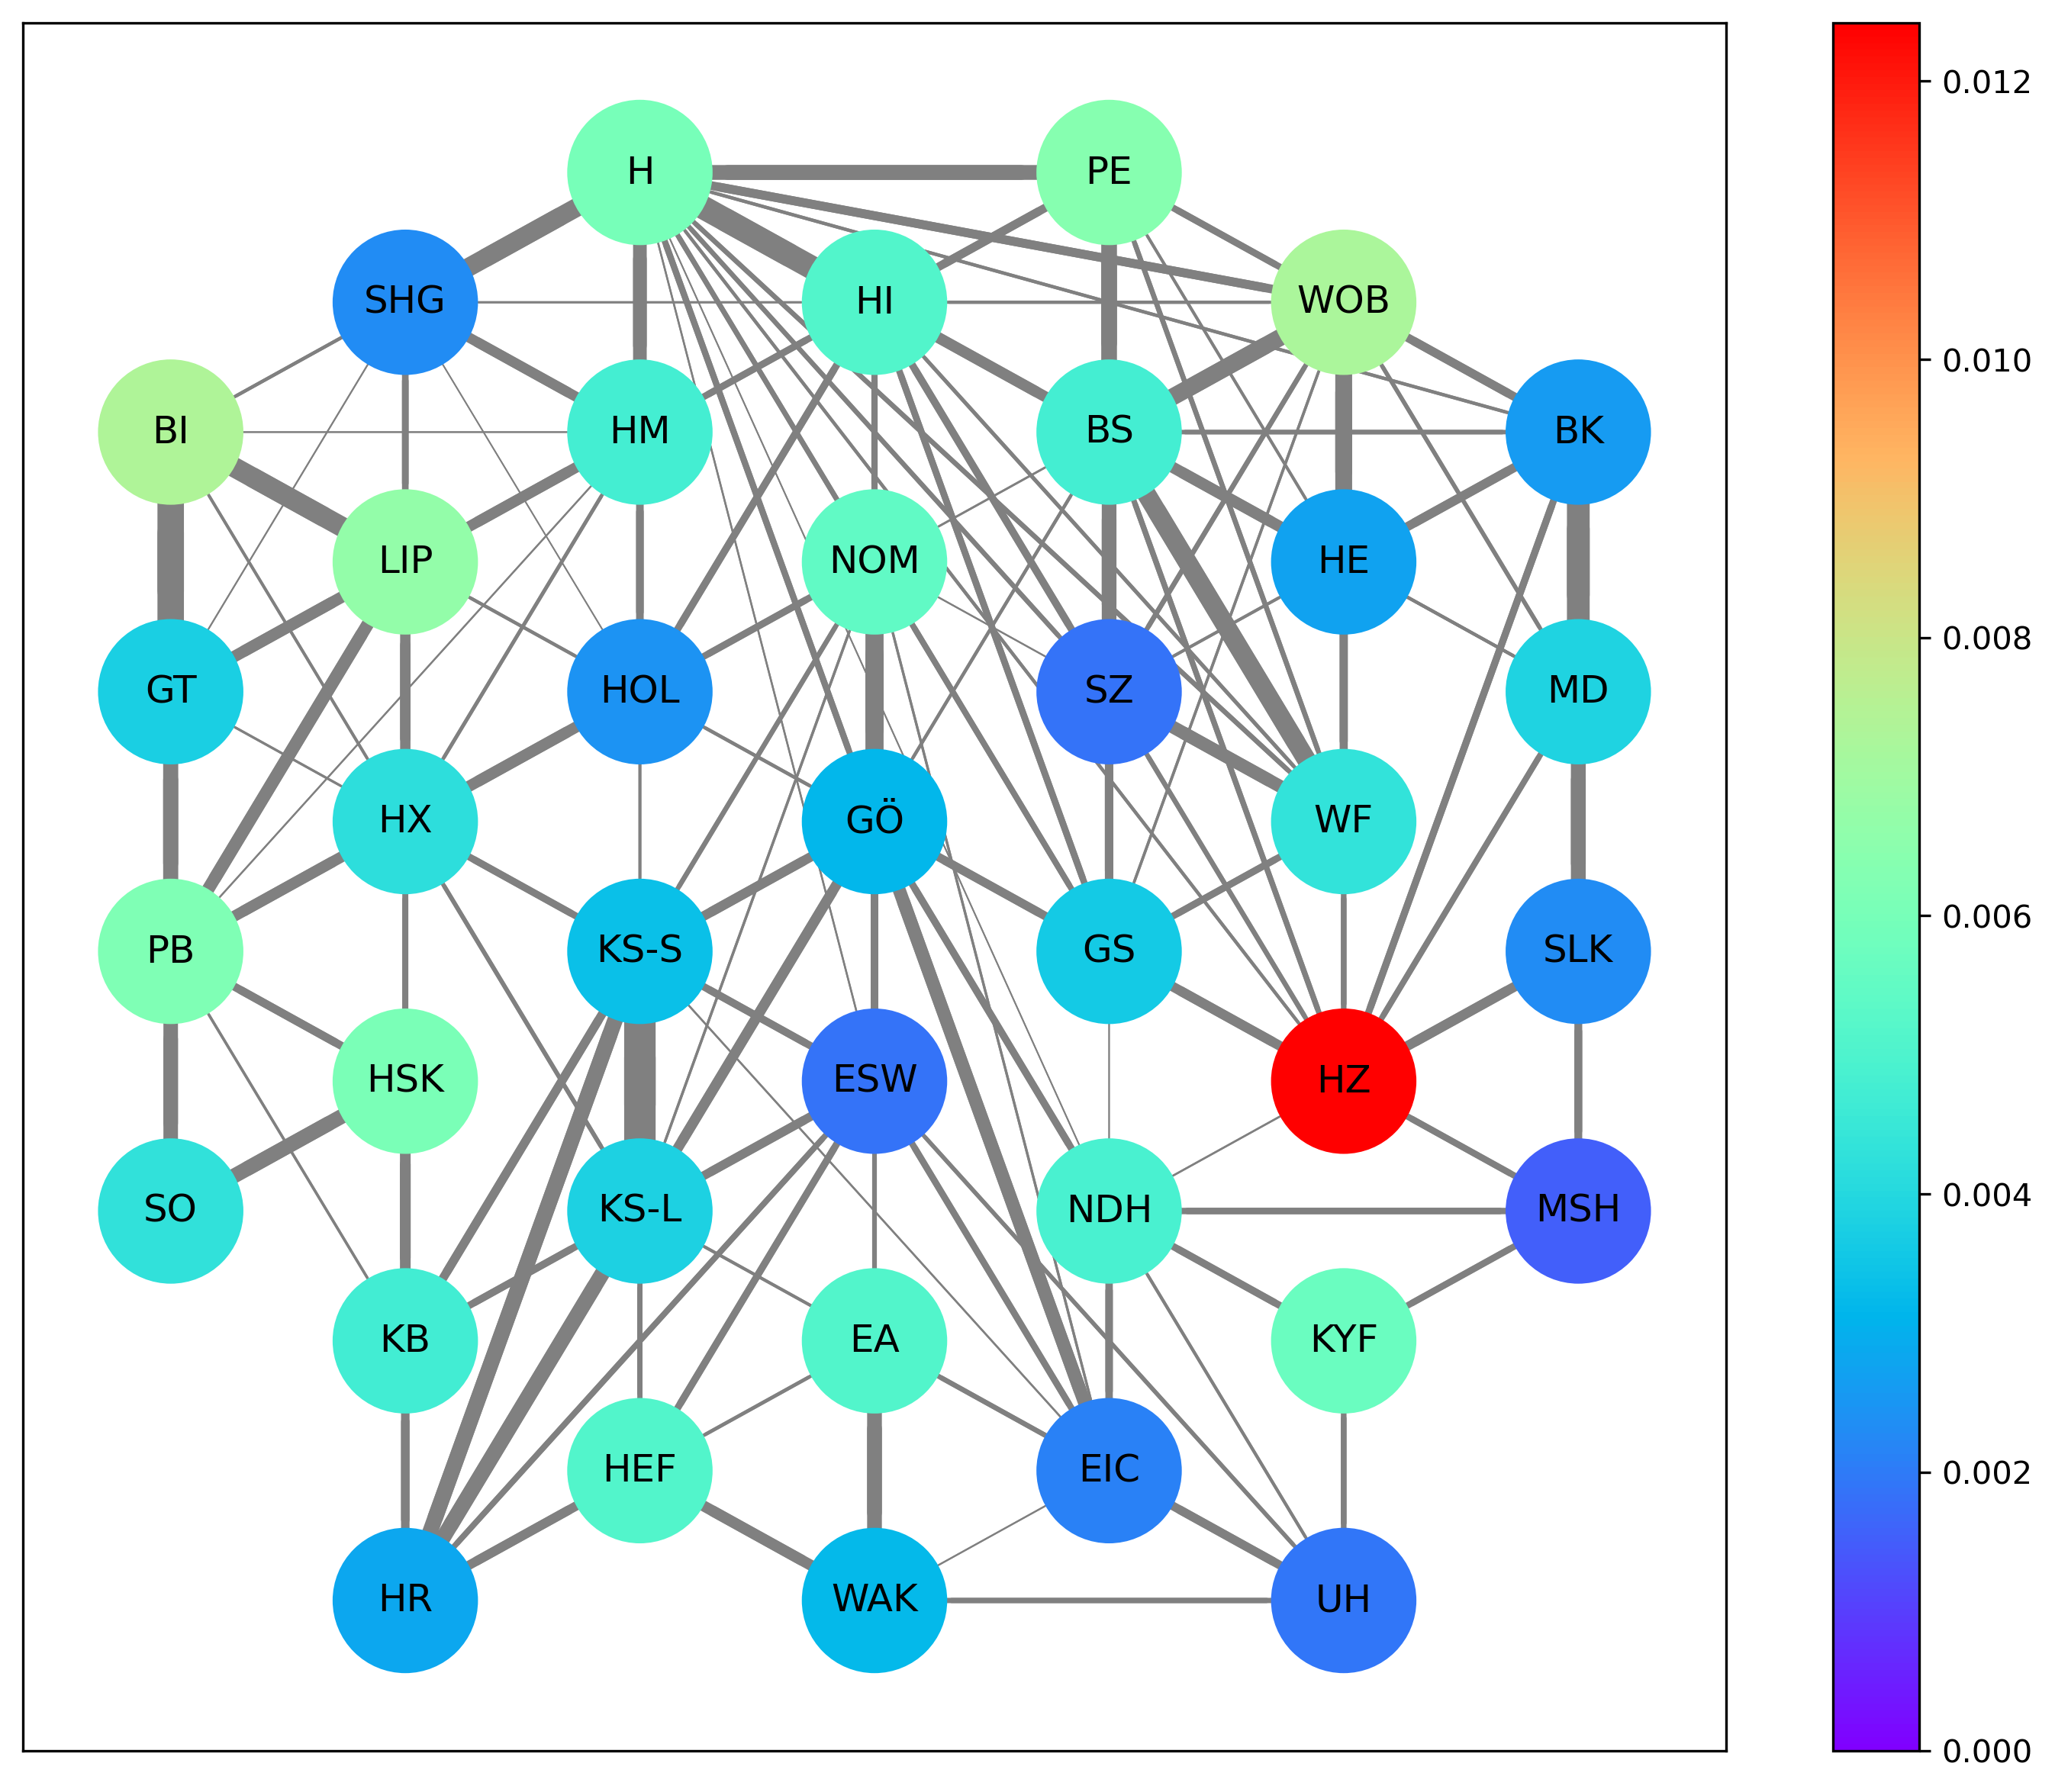

In [8]:
def create_colored_network(matrix,pos,colors):
    """creates and plots undirected weighted network

    Args:
        matrix (array): undirected weighted adjacency matrix
        pos (dictionary): node positions
    """    
    G = nx.DiGraph()
    dim=len(matrix[0])
    for i in range(dim): 
        for j in range(dim): 
            if matrix[i][j] > 0: 
                G.add_edge(i,j, weight=matrix[i][j])
    weights = [np.sqrt(G[u][v]['weight']/500) for u,v in G.edges]
    plt.figure(figsize=(12,10),dpi=300)
    nx.draw_networkx(G,pos, labels=short_labels,node_size=2000, with_labels=True, font_color='black', width=weights, node_color=colors ,edge_color='grey',cmap=plt.cm.rainbow,vmin=0, vmax=max(S_final),arrowsize=1e-10)
    plt.colorbar(ccm)
    plt.savefig('Media/Networks/38_Network_Draft_colored.png')
    plt.show()
    return G, weights

nw38 = create_colored_network(nw_mat, distinct_pos, S_final)

## Video

In [47]:
def plot_cstate(animation_time, graph, weights, pos):
    """plots the network with a dictinct, time-dependent colormap

    Args:
        animation_time (int): time input in days
        graph (networkx graph): already setup graph
        weights (array): edge thickness
        pos ([type]): node positions
        colors ([type]): node colors

    Returns:
        drawn network: frame
    """    
    cmap=[]
    for node in graph:
        cmap.append((1-RKI_data[node][0][animation_time]))
    q=nx.draw_networkx(graph,distinct_pos, labels=short_labels,node_size=2000, with_labels=True, font_color='black', width=weights, node_color=cmap ,edge_color='grey',cmap=plt.cm.rainbow,vmin=0, vmax=max(S_final),arrowsize=1e-10)
    return q

def plot_cstate_optimized(animation_time):
    return plot_cstate(5*animation_time, nw38[0], nw38[1], distinct_pos)

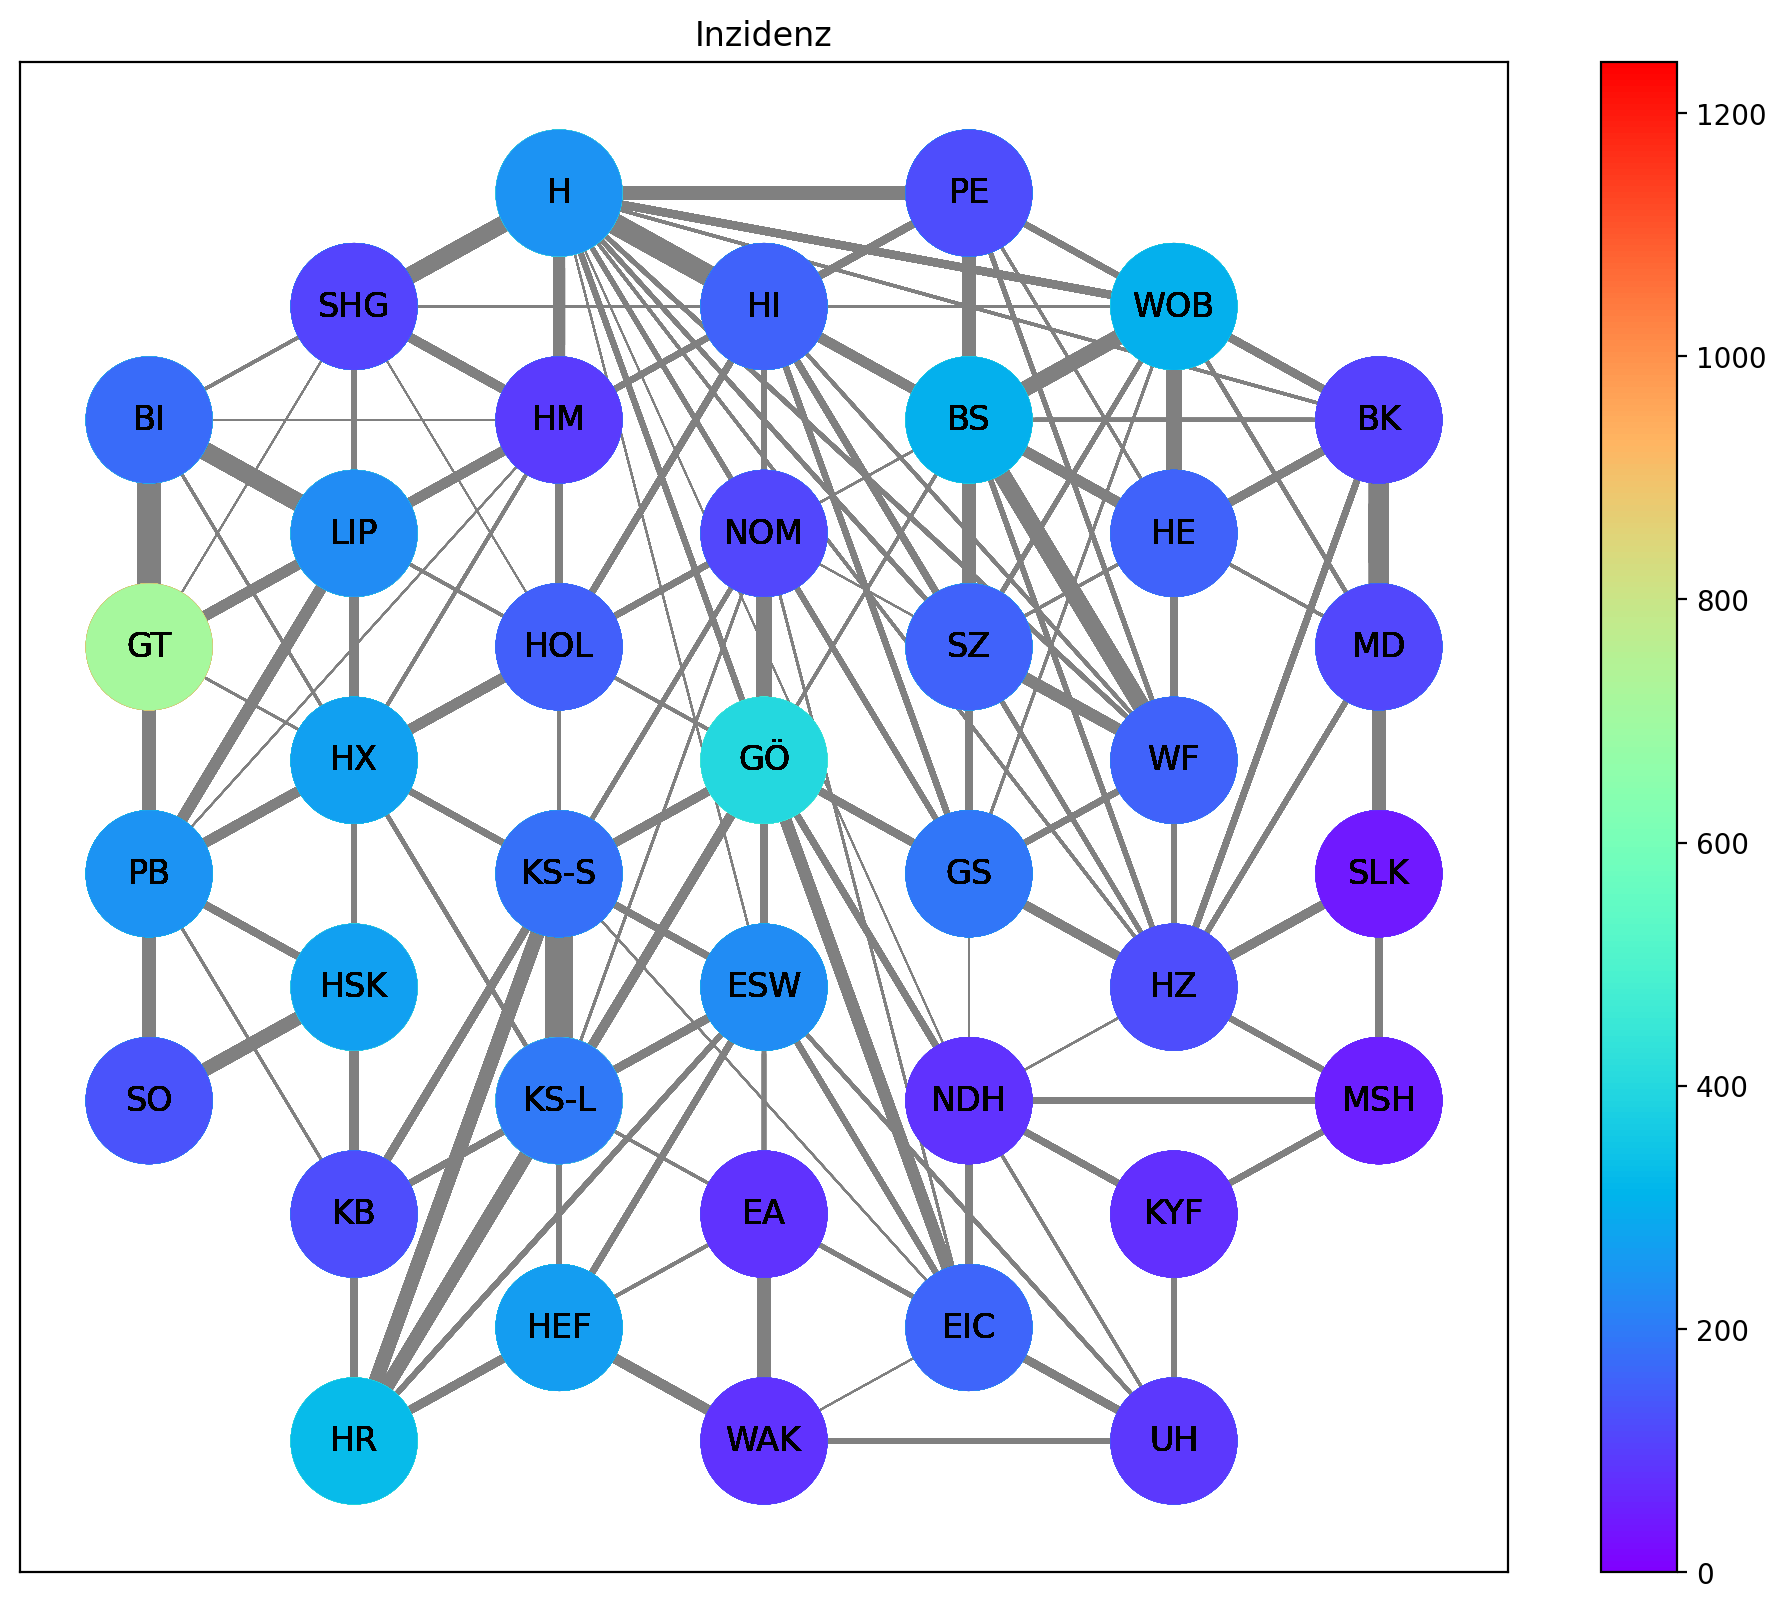

In [48]:
frame_setting=19
interval_setting=math.floor(8000/frame_setting)

plt.figure(figsize=(12,10),dpi=200)
plt.title('Inzidenz')
plt.colorbar(ccm)
ani1 = animation.FuncAnimation(plt.gcf(), plot_cstate_optimized,frames=frame_setting, interval=interval_setting, blit=False,repeat_delay=1000)
HTML(ani1.to_html5_video())